# Gaussian Process for regression (Updated)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
import scipy

## Generate synthetic dataset

In [15]:
# Generate sinusoidal data
np.random.seed(200)
X = np.random.uniform(low=-10, high=10, size=50)
X = np.sort(X)

# Generate t, with random Gaussian noise
t = np.sin(X/1.5)
e = np.random.normal(size=t.shape[0], scale=0.1)
t = t + e

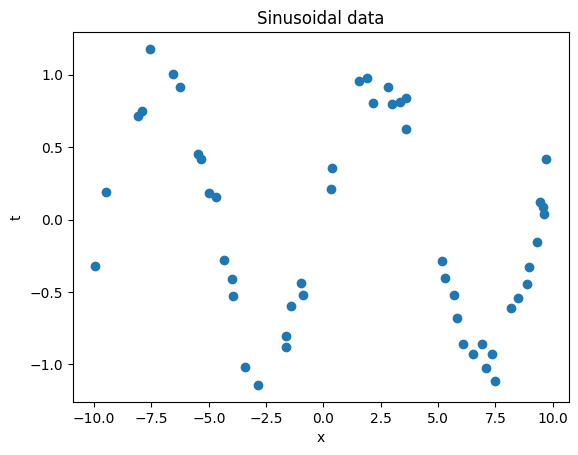

In [16]:
# Plot x and t
plt.scatter(X, t)
plt.xlabel('x')
plt.ylabel('t')
plt.title('Sinusoidal data')
plt.show()

## Implement Gaussian Processes for regression

In [17]:
def gaussian_process_regression(X, Y, noise_var, gamma, test_points):
    """
    Calculate the Gaussian Process prediction
    :param X: inputs
    :param y: targets
    :param noise_var: noise level
    :param test_point: test input
    :return: mean and variance of the prediction
    """
    # Calculate the covariance matrix
    K = rbf_kernel(X.reshape(-1, 1), gamma=gamma)

    # Perform Cholesky factorization of K + noise_var * I
    L = np.linalg.cholesky(K + noise_var * np.eye(K.shape[0]))

    # Calculate alpha
    beta = scipy.linalg.solve_triangular(L, Y, lower=True)
    alpha = scipy.linalg.solve_triangular(L.T, beta, lower=False)

    # Calculate the mean and variance of each test points
    means = []
    vars = []
    for test_point in test_points:
        k_star = rbf_kernel(np.array([test_point]).reshape(-1, 1), X.reshape(-1, 1), gamma=gamma).reshape(-1)
        mean_f = np.dot(k_star, alpha)

        # Calculate the variance
        v = scipy.linalg.solve_triangular(L, k_star.reshape(-1), lower=True)
        var_f = (rbf_kernel(np.array([test_point]).reshape(-1, 1), np.array([test_point]).reshape(-1, 1), gamma=gamma)
                 - np.dot(v, v))[0][0]

        # Append to the mean and variance
        means.append(mean_f)
        vars.append(var_f)

    # Return the mean and variance
    return np.array(means), np.array(vars)

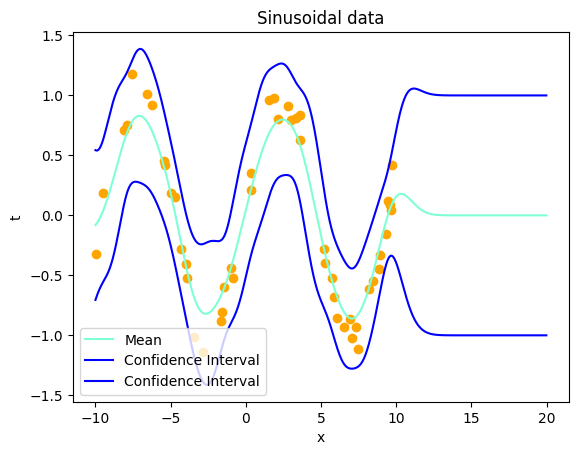

In [28]:
# For the train set
X_test = np.arange(-10, 20, 0.01)
mean_f, var_f = gaussian_process_regression(X, t, 1, 0.5, X_test)

# Draw the training points, means and variances
plt.plot(X_test, mean_f, color='aquamarine', label='Mean')
plt.plot(X_test, mean_f - np.sqrt(var_f), color='blue', label='Confidence Interval')
plt.plot(X_test, mean_f + np.sqrt(var_f), color='blue', label='Confidence Interval')
plt.scatter(X, t, color='orange')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Sinusoidal data')
plt.legend()
plt.savefig('figures/sinusoidal.png')
plt.show()